<div>
<img img class="logo" src="https://medialib.cmcdn.dk/medialibrary/51432DDB-BBE3-4327-85F4-BE3493077470/1D874B35-F493-EC11-84B2-00155D0B0901.png" style="width: 100px;" align="right">
</div>

# <center> Assignment 2 - BuyWise Analytics

### <center> KAN-CDSCV1008U  Applied Machine Learning and Data Engineering in Business Context

In [1]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Importing datasets 
features = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/Features data set.csv")
sales = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/sales data-set.csv")
stores = pd.read_csv("C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedML_Assign.01/Assignment2/Data/stores data-set.csv")

In [3]:
# Convert the date column to datetime format 
features["Date"] = pd.to_datetime(features["Date"], format="%d/%m/%Y")
sales["Date"] = pd.to_datetime(sales["Date"], format="%d/%m/%Y")

### Explore and analyse the data 

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#### Statistic of each dataframe

In [7]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [8]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [9]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [10]:
num_feature_samples, num_features = features.shape
num_sale_samples, num_sale_features = sales.shape
num_stores_samples, num_stores_features = stores.shape
print(f"The feature dataset contains {num_feature_samples} samples and each sample has {num_features} features.")
print(f"The sales dataset contains {num_sale_samples} samples and each sample has {num_sale_features} features.")
print(f"The store dataset contains {num_stores_samples} samples and each sample has {num_stores_features} features.")

The feature dataset contains 8190 samples and each sample has 12 features.
The sales dataset contains 421570 samples and each sample has 5 features.
The store dataset contains 45 samples and each sample has 3 features.


#### Checking for missing values

In [11]:
# For the feature data 
for col in features.columns:
    count_null = features[col].isnull().sum()
    print(f'The column {col} has {count_null} null values')

The column Store has 0 null values
The column Date has 0 null values
The column Temperature has 0 null values
The column Fuel_Price has 0 null values
The column MarkDown1 has 4158 null values
The column MarkDown2 has 5269 null values
The column MarkDown3 has 4577 null values
The column MarkDown4 has 4726 null values
The column MarkDown5 has 4140 null values
The column CPI has 585 null values
The column Unemployment has 585 null values
The column IsHoliday has 0 null values


In [12]:
# For the sales data 
for col in sales.columns:
    count_null = sales[col].isnull().sum()
    print(f'The column {col} has {count_null} null values')

The column Store has 0 null values
The column Dept has 0 null values
The column Date has 0 null values
The column Weekly_Sales has 0 null values
The column IsHoliday has 0 null values


In [13]:
# For the store data 
for col in stores.columns:
    count_null = stores[col].isnull().sum()
    print(f'The column {col} has {count_null} null values')

The column Store has 0 null values
The column Type has 0 null values
The column Size has 0 null values


In [14]:
# Further inspecting the features dataset for missing values
nan_list = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
for column_name in nan_list: 
    nan_frac = features[column_name].isnull().sum() / features[column_name].shape[0]
    print(f'{int(100 * round(nan_frac, 2))}% of {column_name} values are NaN')

51% of MarkDown1 values are NaN
64% of MarkDown2 values are NaN
56% of MarkDown3 values are NaN
57% of MarkDown4 values are NaN
51% of MarkDown5 values are NaN
7% of CPI values are NaN
7% of Unemployment values are NaN


Due to the high number of missing values in the I'm removing the MarkDown variables in the dataset. It seems dificult to replace these missing values, and also dropping these would ultimately lead to a 64% reduction of all the data. 

For the CPI and Unemployment we can impute the missing values by some method. I'm looking into which method is the best. 

#### Handling missing values 

In [15]:
# Codes for forward filling the missing values 
features['CPI'].fillna(method='ffill', inplace=True)
features['Unemployment'].fillna(method='ffill', inplace=True)

In [ ]:
# Codes for backward filling the missing values 
# feature['CPI'].fillna(method='bfill', inplace=True)
# feature['Unemployment'].fillna(method='bfill', inplace=True)

In [18]:
# Dropping the MarkDown Columns 
features.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace=True)

In [19]:
features.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,211.350143,8.106,False


In [21]:
# Checking missing values 
nan_list = ['CPI', 'Unemployment']
for column_name in nan_list: 
    nan_frac = features[column_name].isnull().sum() / features[column_name].shape[0]
    print(f'{int(100 * round(nan_frac, 2))}% of {column_name} values are NaN')

0% of CPI values are NaN
0% of Unemployment values are NaN


In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   CPI           8190 non-null   float64       
 5   Unemployment  8190 non-null   float64       
 6   IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 392.0 KB


#### Analysing the data by date 

In [61]:
features_grouped = features.groupby("Date").agg({"Temperature": "mean",
                                                     "Fuel_Price": "mean",
                                                     "CPI": "mean",
                                                     "Unemployment": "mean",
                                                      "IsHoliday": "max"})
features_grouped.head()

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,
2010-02-05,34.037333,2.717844,167.730885,8.619311,False
2010-02-12,34.151333,2.694022,167.825608,8.619311,True
2010-02-19,37.719778,2.672067,167.871686,8.619311,False
2010-02-26,39.243556,2.683933,167.909657,8.619311,False
2010-03-05,42.917333,2.731200,167.947628,8.619311,False


In [70]:
sales_grouped = sales.groupby("Date").agg({"Weekly_Sales" : "mean"})
#sales_grouped["Weekly_Sales"] = (sales_grouped["Weekly_Sales"] / 1e6).astype(int)
sales_grouped.head()

,Weekly_Sales
Date,
2010-02-05,16836.121997
2010-02-12,16352.056032
2010-02-19,16216.658979
2010-02-26,14899.549688
2010-03-05,15921.015727


In [71]:
# now: create a merged dataframe
data_datewise = pd.merge(features_grouped, sales_grouped, on=["Date"], how="left").reset_index()
data_datewise.head()

,Date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,2010-02-05,34.037333,2.717844,167.730885,8.619311,False,16836.121997
1,2010-02-12,34.151333,2.694022,167.825608,8.619311,True,16352.056032
2,2010-02-19,37.719778,2.672067,167.871686,8.619311,False,16216.658979
3,2010-02-26,39.243556,2.683933,167.909657,8.619311,False,14899.549688
4,2010-03-05,42.917333,2.731200,167.947628,8.619311,False,15921.015727


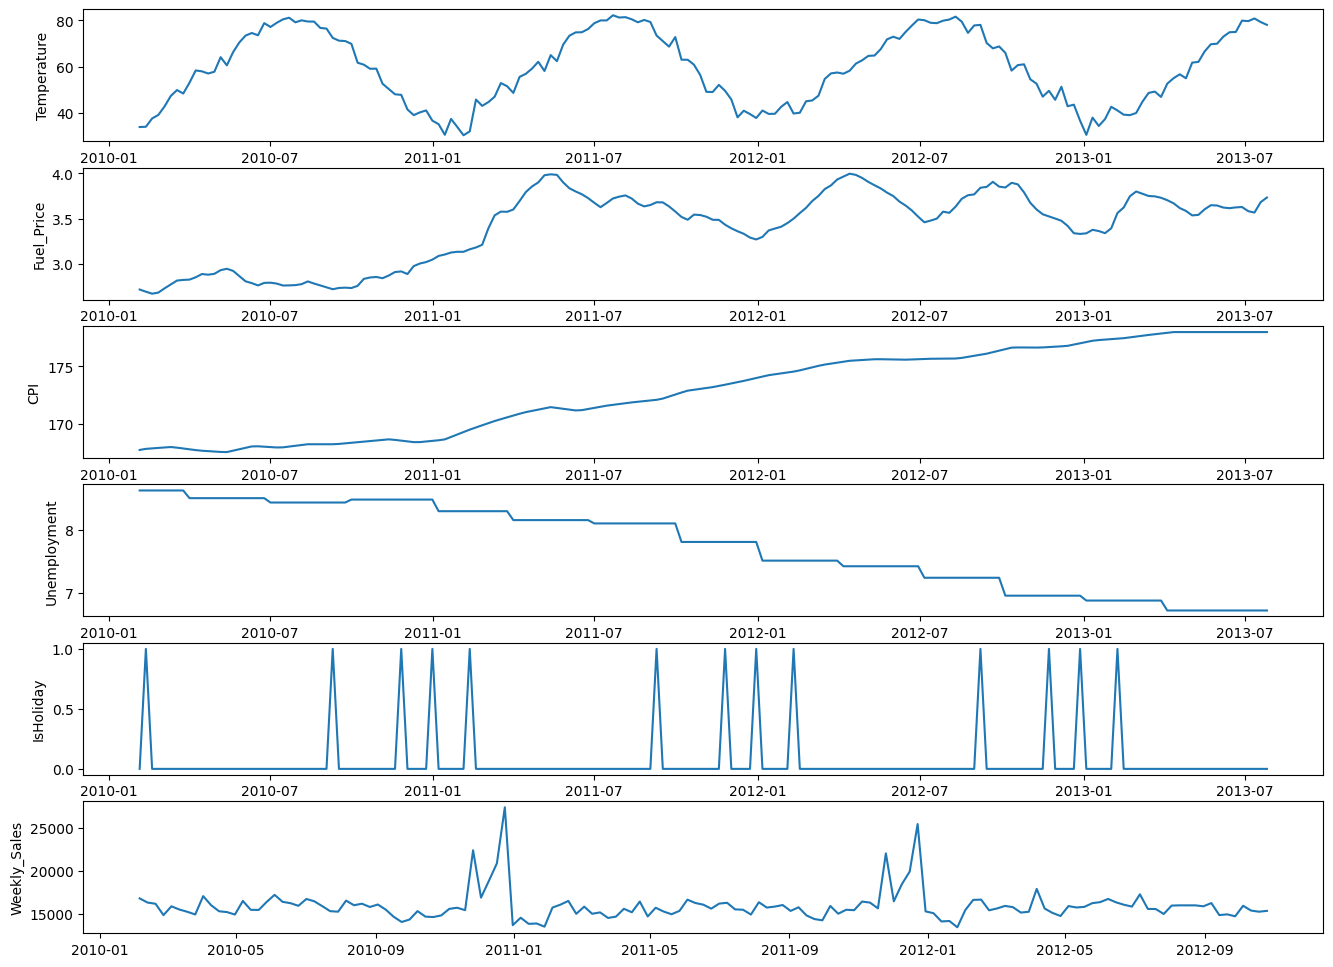

In [72]:
fig = plt.figure(figsize = (16, 12))
count_columns_ex_date = len(data_datewise.columns[1:])
for idx, col in enumerate(data_datewise.columns[1:]):
    plt.subplot(count_columns_ex_date, 1, idx+1)
    plt.plot(data_datewise["Date"], data_datewise[col])
    plt.ylabel(col)

Text(0, 0.5, 'Weekly Sales (Mean)')

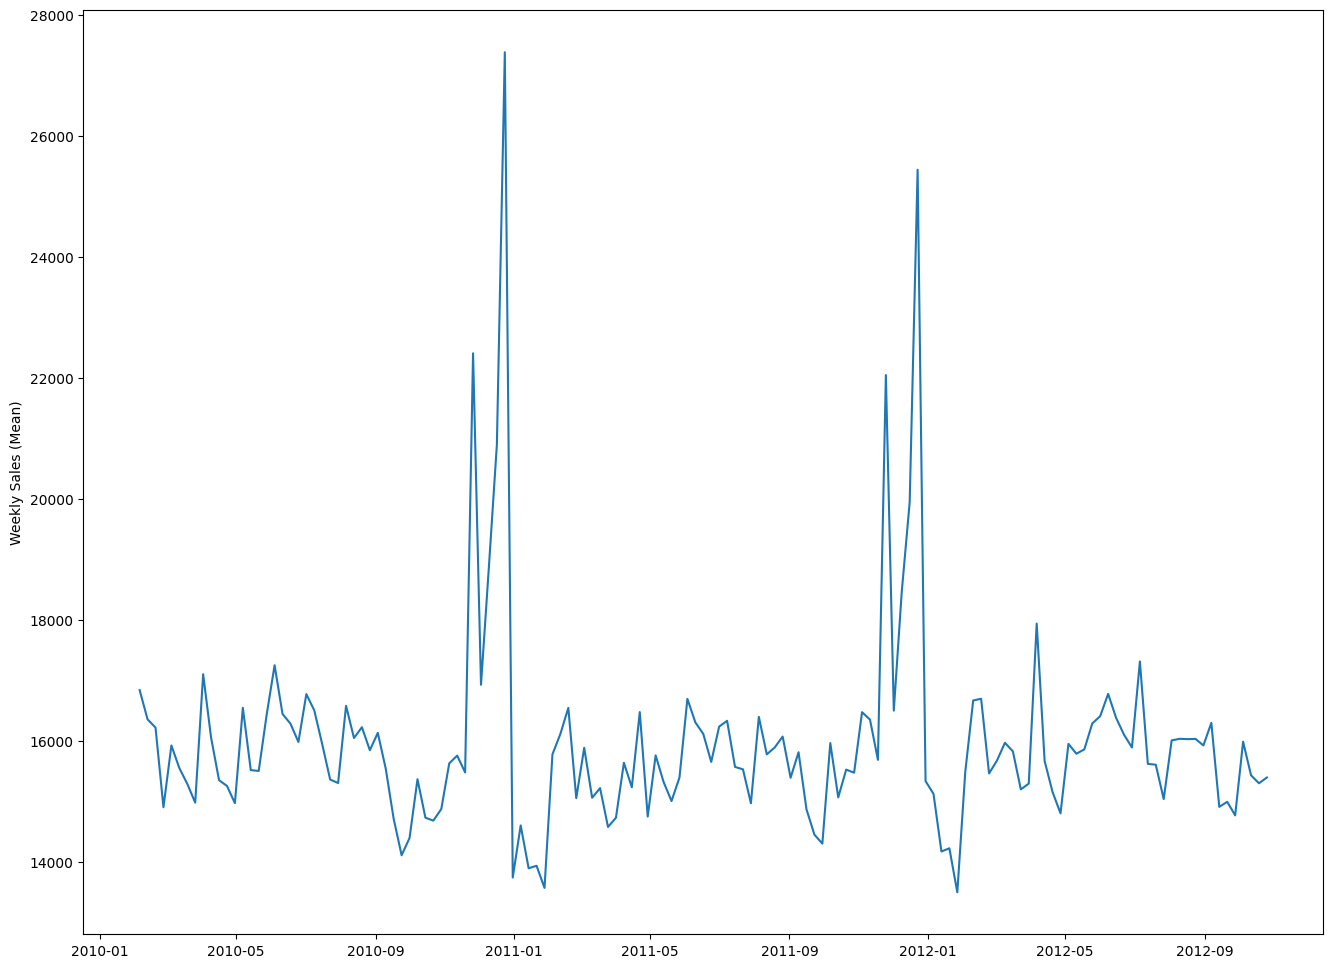

In [74]:
fig = plt.figure(figsize = (16, 12))
plt.plot(data_datewise["Date"], data_datewise["Weekly_Sales"])
plt.ylabel("Weekly Sales (Mean)")

<AxesSubplot: >

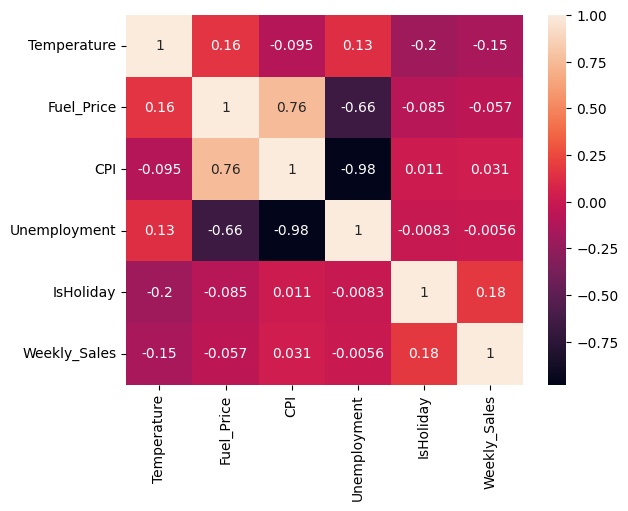

In [46]:
sns.heatmap(data_datewise.corr(), annot=True)

#### Analysing the data storewise

In [79]:
sales_grouped = sales.groupby("Store").agg({"Weekly_Sales": "sum",
                                                 "IsHoliday": "min"})
data_storewise = pd.merge(stores, sales_grouped, on=["Store"], how="left")
data_storewise["Weekly_Sales"] = (data_storewise["Weekly_Sales"] / 1e6).astype(int)
data_storewise.head()

,Store,Type,Size,Weekly_Sales,IsHoliday
0,1,A,151315,222,False
1,2,A,202307,275,False
2,3,B,37392,57,False
3,4,A,205863,299,False
4,5,B,34875,45,False


In [80]:
# Encode the 'Type' variable 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_storewise['Type'] = encoder.fit_transform(data_storewise['Type'])

<AxesSubplot: xlabel='Type', ylabel='Size'>

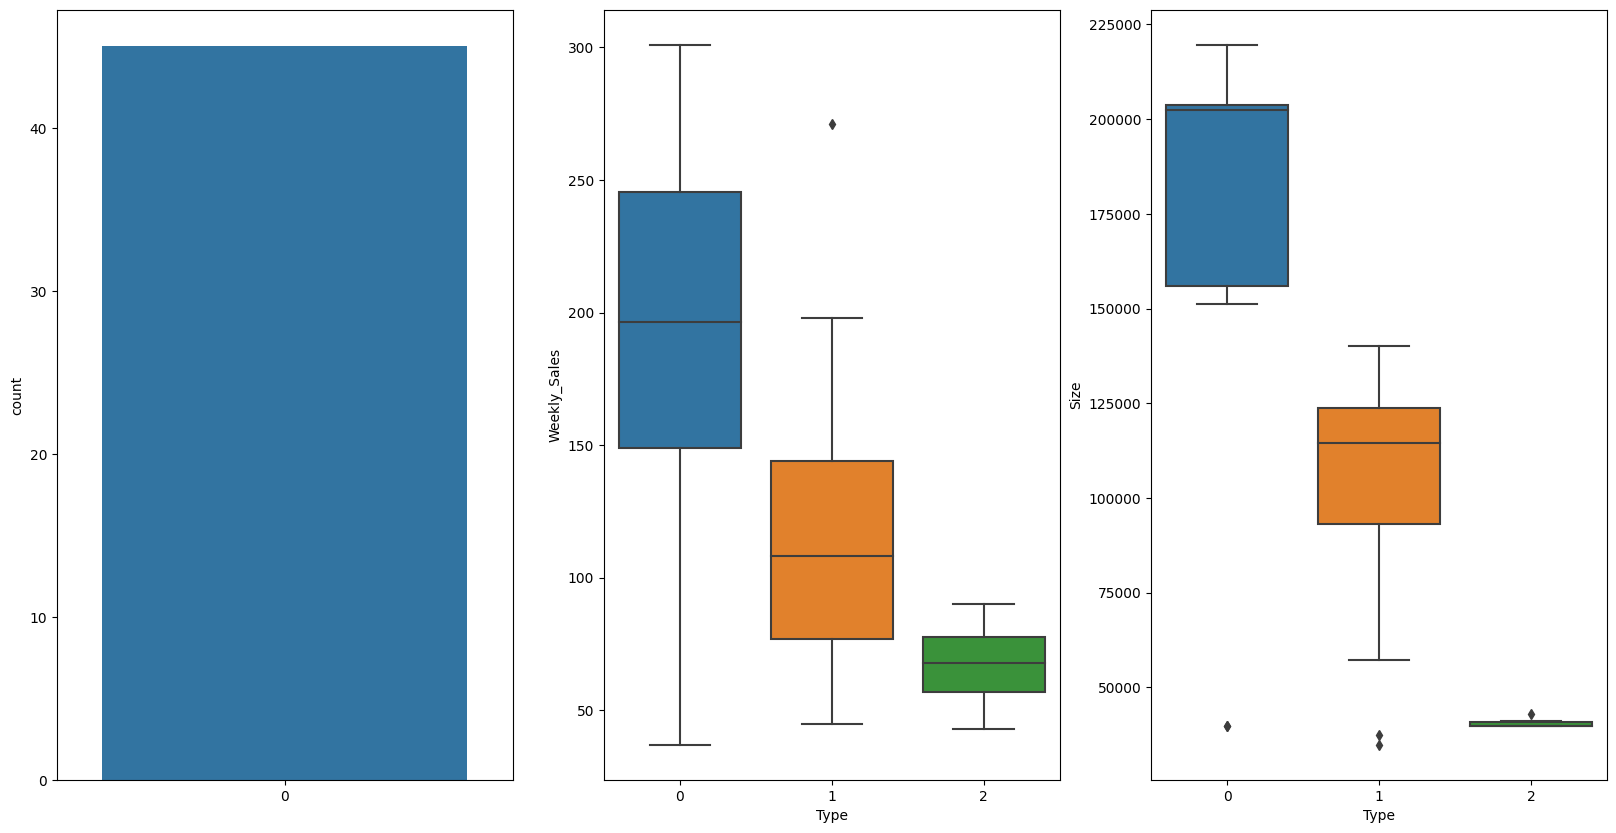

In [81]:
# create histogram of weekly sales per store
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
sns.countplot(data_storewise["Type"], ax=ax1)
sns.boxplot(data=data_storewise, y="Weekly_Sales", x="Type", ax=ax2)
sns.boxplot(data=data_storewise, y="Size", x="Type", ax=ax3)

Text(0.5, 0, 'Store Number')

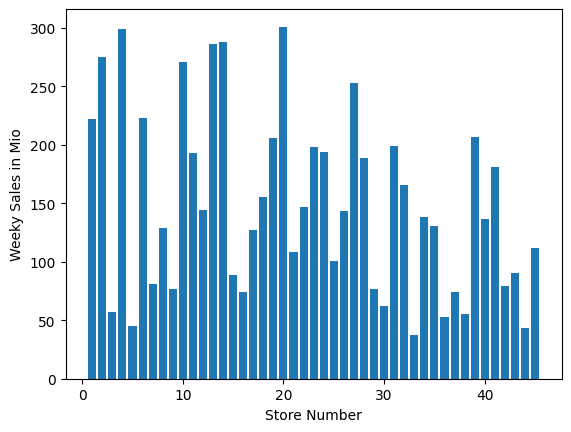

In [82]:
# weekly sales per store
bins = np.arange(1, 46)
plt.bar(x=bins, height=data_storewise["Weekly_Sales"].to_numpy())
plt.ylabel("Weeky Sales in Mio")
plt.xlabel("Store Number")

<AxesSubplot: >

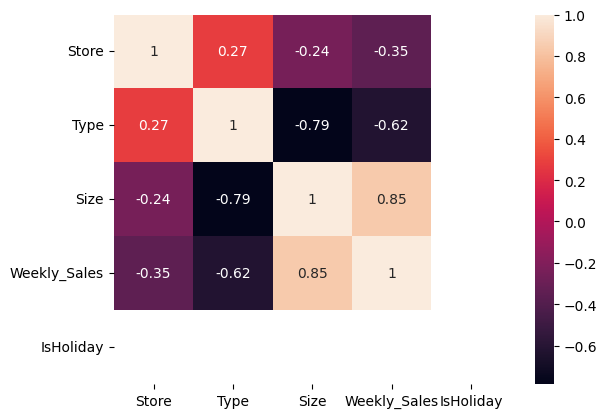

In [83]:
sns.heatmap(data_storewise.corr(), annot=True)

## Combinding the data 

In [84]:
# Merging the data 
sf_df = pd.merge(sales, features, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(stores, sf_df, on = ['Store'], how = 'left') 

In [85]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106


In [87]:
# Further inspecting the features dataset for missing values
nan_list = ['CPI', 'Unemployment']
for column_name in nan_list: 
    nan_frac = df[column_name].isnull().sum() / df[column_name].shape[0]
    print(f'{int(100 * round(nan_frac, 2))}% of {column_name} values are NaN')

0% of CPI values are NaN
0% of Unemployment values are NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Type          421570 non-null  object        
 2   Size          421570 non-null  int64         
 3   Dept          421570 non-null  int64         
 4   Date          421570 non-null  datetime64[ns]
 5   Weekly_Sales  421570 non-null  float64       
 6   IsHoliday     421570 non-null  bool          
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 35.8+ MB
